In [1]:
# Works best with jupyter-notebook

In [2]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np

#from spatialmath import *
#from spatialmath.base import *

from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr

import matplotlib.pyplot as plt
np.set_printoptions(linewidth=50, formatter={'float': lambda x: f"{x:6.4g}" if abs(x) > 1e-10 else f"{0:6.4g}"})

# Lecture 4.4 - Trajectories with Via Points

What happens when instead of wanting a simple trajectory from point A to point B, we want a more complicated trajectory for the robot's end-effector?

Think of human skills...
- We may have simple line motions from a to b... 
- But we may also have harmonic motions like those in walking, running, ridying a bike, swimming...
- Or what about opening a door with a key...
- Making artifacts...

Things get a ibt more complicated. 

Let's start with a very simply 1D problem with 3 points (including start and finish) and two segments. I encourage you to try more complicated waypoints by yourself.

In [3]:
#Set a first point of 10, a last point of 30 and via points of 10, 20, 10 and the last point
first = np.array(10)
last  = np.array(10)

via = np.array([
    [10],
    [20],
    [10]
    ])

print("First: ", first, "\nLast: ", last, "\nVia Points: \n", via.squeeze())

First:  10 
Last:  10 
Via Points: 
 [10 20 10]


Compute a trajectory with via points using the toolbox function **mstraj()**.

Params: 
 - via points (one per row)
 - time step <secs> (dt)
 - acceleration time <secs> (tacc)
    
   
 - max speed, defaults to none <units/sec> (qd)
 - max time of each motion segment <secs> (tseg)
    
    
 - initial via point position
 - initial via point velocity
    
    
 - returns trajectory plus extra info <tuple> as a named tuple
    
The return value is a namedtuple (named ``mstraj``) with elements:
    
        - t:  time as a numpy ndarray, shape=(K,)
        - q:  axis values as a numpy ndarray, shape=(K,N)
        - arrive: list of arrival times for each segment
        - info: named tuples list, one per segment, describe (slowest axis, segment time, time stamp)
        - via: the passed set of via points
    
    The  trajectory proper is (``traj.t``, ``traj.q``).  The trajectory is a matrix has one row per time step, and one column per axis.


In [4]:
speed = 1   # velocity is 1 unit/second
dt    = 1   # time interval 0.1 seconds
tacc  = 0   # acceleration time 2 secondsb

out = tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

1 0.1 [    11]
2 0.2 [    12]
3 0.3 [    13]
4 0.4 [    14]
5 0.5 [    15]
6 0.6 [    16]
7 0.7 [    17]
8 0.8 [    18]
9 0.9 [    19]
10 1.0 [    20]
1 0.1 [    19]
2 0.2 [    18]
3 0.3 [    17]
4 0.4 [    16]
5 0.5 [    15]
6 0.6 [    14]
7 0.7 [    13]
8 0.8 [    12]
9 0.9 [    11]
10 1.0 [    10]


/media/juan/sdd/python/toolbox/robotics-toolbox-python/roboticstoolbox/tools/trajectory.py:727: RuntimeWarning: invalid value encountered in true_divide
  qd = dq / tseg
/media/juan/sdd/python/toolbox/robotics-toolbox-python/roboticstoolbox/tools/trajectory.py:267: RuntimeWarning: invalid value encountered in true_divide
  t = tv.flatten() / tscal


Notice how the information above is divided into two segments. You can further experiment with changing dt to other values. 

Duration Information:

In [5]:
b

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19]
The trajectory lasts a total of  20  secs.


Position Information:

In [6]:
print('The path visited by the end-effector would have been: \n', out.q.squeeze())
print('The length of the trajectory is: ', len(out.q))

The path visited by the end-effector would have been: 
 [    11     12     13     14     15     16     17
     18     19     20     19     18     17     16
     15     14     13     12     11     10]
The length of the trajectory is:  20


Segment Time Arrivals:

In [7]:
print("The segments times are as follows \n", out.arrive)

The segments times are as follows 
 [     0     10     20]


Via point information:

In [8]:
print("My via points are: \n", out.via.squeeze())

My via points are: 
 [10 20 10]


### Plotting 

We can also plot the position over time... and we can compare vs. different set of input arguments.

<IPython.core.display.Javascript object>


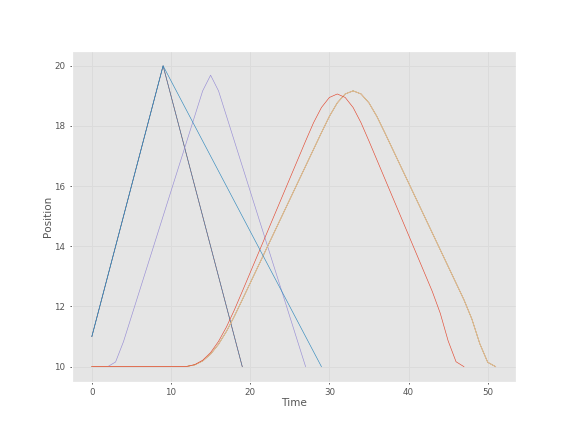

In [9]:
fig1 = plt.figure(1);

plt.plot(out.t, out.q);
plt.xlabel('Time');
plt.ylabel('Position');

### Example 2:

Increasing the acceleration time from 0 to 2 seconds, increases the duration of our acceleration (slows down the trajectory).

So, to achieve starting/final via points smoothly, the trajectory moves away from the via points.

In [10]:
# control precision
np.set_printoptions(precision=4)

In [11]:
speed = 1   
dt    = 1 
tacc  = 2 

out2 = tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

2 0.5 [10.]
3 0.75 [10.]
2 0.16666666666666666 [11.6667]
3 0.25 [12.5]
4 0.3333333333333333 [13.3333]
5 0.4166666666666667 [14.1667]
6 0.5 [15.]
7 0.5833333333333334 [15.8333]
8 0.6666666666666666 [16.6667]
9 0.75 [17.5]
10 0.8333333333333334 [18.3333]
11 0.9166666666666666 [19.1667]
2 0.16666666666666666 [18.3333]
3 0.25 [17.5]
4 0.3333333333333333 [16.6667]
5 0.4166666666666667 [15.8333]
6 0.5 [15.]
7 0.5833333333333334 [14.1667]
8 0.6666666666666666 [13.3333]
9 0.75 [12.5]
10 0.8333333333333334 [11.6667]
11 0.9166666666666666 [10.8333]


In [12]:
print("Via points are still the same: \n", out2.via.T, '\n')
print("This time, the duration of the trajectory is {} secs longer, for a total of {}".format(out2.t[-1]-out.t[-1],out2.t[-1]+dt))

Via points are still the same: 
 [[10 20 10]] 

This time, the duration of the trajectory is 8 secs longer, for a total of 28


Let's look at the positions:

In [16]:
print(out2.q)

[[10.    ]
 [10.    ]
 [10.    ]
 [10.1562]
 [10.8333]
 [11.6667]
 [12.5   ]
 [13.3333]
 [14.1667]
 [15.    ]
 [15.8333]
 [16.6667]
 [17.5   ]
 [18.3333]
 [19.1667]
 [19.6875]
 [19.1667]
 [18.3333]
 [17.5   ]
 [16.6667]
 [15.8333]
 [15.    ]
 [14.1667]
 [13.3333]
 [12.5   ]
 [11.6667]
 [10.8333]
 [10.    ]]


Let's plot it in the above figure and compare with the first plot.

In [15]:
plt.plot(out2.t, out2.q);
plt.xlabel('Time');
plt.ylabel('Position');

Let's now slow things down quite significantly by increasing acceleration time duration from 2 to 8 secs.

In [24]:
print("Via points are still the same: \n", out3.via.T, '\n')
print("This time, the duration of the trajectory is {} secs longer than the previous example, for a total of {}".format(out3.t[-1]-out2.t[-1],out3.t[-1]+dt))

Via points are still the same: 
 [[10 20 10]] 

This time, the duration of the trajectory is 24 secs longer than the previous example, for a total of 52


### Example 3:

Even slower. Increase acceleration duration time x3

In [25]:
#Increasing acceleration time from 2 to 8 seconds
speed = 1   
dt    = 1 
tacc  = 8 

out3 = tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

5 0.3125 [10.]
6 0.375 [10.]
7 0.4375 [10.]
8 0.5 [10.]
9 0.5625 [10.]
10 0.625 [10.]
11 0.6875 [10.]
12 0.75 [10.]
5 0.2777777777777778 [12.7778]
6 0.3333333333333333 [13.3333]
7 0.3888888888888889 [13.8889]
8 0.4444444444444444 [14.4444]
9 0.5 [15.]
10 0.5555555555555556 [15.5556]
11 0.6111111111111112 [16.1111]
12 0.6666666666666666 [16.6667]
13 0.7222222222222222 [17.2222]
14 0.7777777777777778 [17.7778]
5 0.2777777777777778 [17.2222]
6 0.3333333333333333 [16.6667]
7 0.3888888888888889 [16.1111]
8 0.4444444444444444 [15.5556]
9 0.5 [15.]
10 0.5555555555555556 [14.4444]
11 0.6111111111111112 [13.8889]
12 0.6666666666666666 [13.3333]
13 0.7222222222222222 [12.7778]
14 0.7777777777777778 [12.2222]


Let's once again plot and examine.

In [21]:
plt.plot(out3.t, out3.q);
plt.xlabel('Time');
plt.ylabel('Position');

### Example 4:
Now increase the velocity x4

If we increase the velocity, the amount of time taken to execute the trajectory is reduced.

In [22]:
speed = 4   # increased velocity amount by x4
dt    = 1 
tacc  = 8 

out4 = tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

5 0.3125 [10.]
6 0.375 [10.]
7 0.4375 [10.]
8 0.5 [10.]
9 0.5625 [10.]
10 0.625 [10.]
11 0.6875 [10.]
12 0.75 [10.]
5 0.3125 [13.125]
6 0.375 [13.75]
7 0.4375 [14.375]
8 0.5 [15.]
9 0.5625 [15.625]
10 0.625 [16.25]
11 0.6875 [16.875]
12 0.75 [17.5]
5 0.3125 [16.875]
6 0.375 [16.25]
7 0.4375 [15.625]
8 0.5 [15.]
9 0.5625 [14.375]
10 0.625 [13.75]
11 0.6875 [13.125]
12 0.75 [12.5]


In [28]:
print("Via points are still the same: \n", out4.via.T, '\n')
print("This time, the duration of the trajectory is {} secs longer than the previous example, for a total of {}".format(out4.t[-1]-out3.t[-1], out4.t[-1]+dt))

Via points are still the same: 
 [[10 20 10]] 

This time, the duration of the trajectory is -4 secs longer than the previous example, for a total of 48


Let us plot for visualization

In [29]:
plt.plot(out4.t, out4.q)
plt.xlabel('Time')
plt.ylabel('Position')

Text(53.17910447761194, 0.5, 'Position')

### Fix segment time duration instead of velocity

Finally, we can set the duration of each segment instead of the velocity. 

To do so, we mark a 'duration' for the subsequent via point. For n points, there will be an array of dimension (n,). 

In our simple example from above:
- Point 1: duration  0 secs
- Point 2: duration 10 secs
- Point 3: duration 20 secs

In [34]:
dt   = 1 # simple dt
tacc = 0 # no acceleration

out5 = tr.mstraj(via, dt, tacc, tsegment=[0, 10, 20], q0=first)

1 0.1 [11.]
2 0.2 [12.]
3 0.3 [13.]
4 0.4 [14.]
5 0.5 [15.]
6 0.6 [16.]
7 0.7 [17.]
8 0.8 [18.]
9 0.9 [19.]
10 1.0 [20.]
1 0.05 [19.5]
2 0.1 [19.]
3 0.15 [18.5]
4 0.2 [18.]
5 0.25 [17.5]
6 0.3 [17.]
7 0.35 [16.5]
8 0.4 [16.]
9 0.45 [15.5]
10 0.5 [15.]
11 0.55 [14.5]
12 0.6 [14.]
13 0.65 [13.5]
14 0.7 [13.]
15 0.75 [12.5]
16 0.8 [12.]
17 0.85 [11.5]
18 0.9 [11.]
19 0.95 [10.5]
20 1.0 [10.]


Time information:

In [35]:
print(out5.t)
print("The trajectory lasts a total of ", out5.t[-1]+dt, " secs.") # not inclusive of end.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
The trajectory lasts a total of  30  secs.


Position information:

In [36]:
print('The path visited by the end-effector would have been: \n', out.q.squeeze())
print('The length of the trajectory is: ', len(out.q))

The path visited by the end-effector would have been: 
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 19. 18.
 17. 16. 15. 14. 13. 12. 11. 10.]
The length of the trajectory is:  20


Plot to visualize:

In [37]:
plt.plot(out5.t, out5.q);
plt.xlabel('Time');
plt.ylabel('Position');

Text(53.17910447761194, 0.5, 'Position')

### Student Exercise
Change the acceleration duration time while fixing the time segments. See the result.